# BCIS 5110 
# KIVA PROJECT REPORT
SUBMITTED BY:
#FAWAD KHAN 

## Executive Summary
Everyone should have the opportunity to be funded in a free market economy, but, there are more restrictions than one might expect. However, some countries also lack the infrastructure needed to support small company financing. 
These constraints give rise to a microlending market. Microlending has exploded across the world, assisting in the adoption of capitalism as the normal economic system in a more globalized society.

Kiva.org is an online crowdfunding platform that offers monetary services to needful and people with insufficient funds around the world. Kiva lenders have extended over 1 billion dollars in loans to around 2 million people across the world. 
Knowing the level of poverty of each borrower is crucial to setting investment priorities, helping lenders make informed decisions and understanding their target communities. However, this requires inference based on a limited number of details about each borrower.

We analyzed data utilizing Python hosted on Jupyter Notebooks-based workbench to assist Kiva in building an accurate and localized model to estimate the poverty levels of people based on the location of active Kiva loans.
Furthermore, we are attempting to use all the relevant information about a Kiva borrower in order to estimate a borrower's welfare level using regional averages by gender, sector, or borrowing behavior.

## Project Motivation/Background

Project Background and Motivation
Kiva is a non-profit organization based in San Francisco, California, allows people to lend money to low-income entrepreneurs and students in 77 countries. 

Kiva's mission is to "enhance the financial inclusion of underserved communities." As of 2005, Kiva has funded 1.6 million loans totaling more than $1.33 billion, with a repayment rate of 95.8%. 

The Kiva platform is used by more than 1.8 million lenders worldwide.

Loan lenders do not receive interest on loans. Kiva offers lenders a way to connect with borrowers on a human level by including stories about the people who apply for loans.

As part of Kiva's field partner network, which can include microfinance institutions, social impact businesses, schools or non-profit organizations, loans are administered on the ground through these partners. 
Kiva's users, corporations, and national institutions provide grants, loans, and donations to help support its operations. The majority of loans to its field partners carry interest, and Kiva charges small fees to its field partners.

## Data Description

A random sample of 5,000 Kiva loans and associated repayment plans are included in the data collection. We have 3 datasets that are used for this project which are listed as follows:

Lender dataset: This data gives us the information about the lender’s name, location, occupation etc.<br>
Loan Lenders dataset: This data gives us the information about the financial institution that makes the funds available to lender.<br>
Loan dataset: This data gives us the information about the loan, reason for the loan and the status of loan etc.<br>
Below is the list of variables given in our dataset and their definitions:<br>
id: Loan ID<br>
status: Loan status with different levels through which loan is processed by Kiva.<br>
funded_amount: Amount of loan which has been purchased by Kiva lenders<br>
paid_amount: Amount of the loan which has been paid off<br>
activity: Activity for which loan is requested<br>
sector: Sector for which loan is requested<br>
location.country_code: Country code<br>
location.country: Country name<br>
location.town: Town name<br>
partner_id: Field partner ID for local lending institutions, see a complete list at http://api.kivaws.org/v1/partners.json <br>
borrowers.first_name: First name of borrower<br>
borrowers.last_name: Last name of borrower<br>
borrowers.gender: Gender of borrower<br>
disbursal_amount: The amount of money distributed to the borrower in the local currency. Comparing this amount to the loan amount shows the currency conversion rate locked in for the loan when it was posted.<br>
disbursal_currency: Currency used to distribute the loan the borrower. This is usually the local currency for the borrower's country.<br>
terms.disbursal_date: The date at which the funds from the loan were given to the borrowers. Note that it is possible for the money to be disbursed to borrowers before the loan is posted on Kiva.<br>
loan_amount: The amount of money distributed to the borrower in lender's currency.<br>
posted_date: Date when loan was posted on Kiva.<br>
funded_date: Date when loan was fully funded on Kiva.<br>
terms.local_payments.due_date: Date when payment is due to the field partner<br>
terms.local_payments.amount: Amount (in local currency) due to the field partner<br>
terms.scheduled_payments.due_date: Date when payment is due to the lender<br>
amount: Payment amount in US dollars<br>
payment_id: Payment ID<br>
local_amount: Payment amount in local currency<br>
processed_date: Date payment is processed<br>
lat: Latitude of loan location<br>
lon: Longitude of loan location <br>


## Data Analysis
## In this assignment, we start to work on Kiva datasets.

In [12]:
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
#Import the library
import pandas as pd
import numpy as np

1. Read in the three tables (the original dataset you downloaded, not the sample I provided for your initial report.)

In [14]:
#Read the tables
loans = pd.read_csv('C:/Users/fawad/OneDrive/Desktop/MBA/Python/loans.csv')
lenders = pd.read_csv('C:/Users/fawad/OneDrive/Desktop/MBA/Python/lenders.csv')
loans_lenders = pd.read_csv('C:/Users/fawad/OneDrive/Desktop/MBA/Python/loans_lenders.csv')

2. Display the information about each dataframe.

In [49]:
#display information about the dataframe
loans.info()
lenders.info()
loans_lenders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20872 entries, 0 to 20871
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOAN_ID                          20872 non-null  int64  
 1   LOAN_NAME                        20371 non-null  object 
 2   ORIGINAL_LANGUAGE                20416 non-null  object 
 3   DESCRIPTION                      20416 non-null  object 
 4   DESCRIPTION_TRANSLATED           16314 non-null  object 
 5   FUNDED_AMOUNT                    20872 non-null  float64
 6   LOAN_AMOUNT                      20872 non-null  float64
 7   STATUS                           20872 non-null  object 
 8   IMAGE_ID                         20416 non-null  float64
 9   VIDEO_ID                         13 non-null     float64
 10  ACTIVITY_NAME                    20872 non-null  object 
 11  SECTOR_NAME                      20872 non-null  object 
 12  LOAN_USE          

3. Check for missing values of the loans dataframe. You can use sum() to find out the number of missing values.

In [50]:
loans.isnull().sum()
# number of missing values in each column of loans dataframe

LOAN_ID                                0
LOAN_NAME                            501
ORIGINAL_LANGUAGE                    456
DESCRIPTION                          456
DESCRIPTION_TRANSLATED              4558
FUNDED_AMOUNT                          0
LOAN_AMOUNT                            0
STATUS                                 0
IMAGE_ID                             456
VIDEO_ID                           20859
ACTIVITY_NAME                          0
SECTOR_NAME                            0
LOAN_USE                             456
COUNTRY_CODE                           0
COUNTRY_NAME                           0
TOWN_NAME                           1773
CURRENCY_POLICY                        0
CURRENCY_EXCHANGE_COVERAGE_RATE     4719
CURRENCY                               0
PARTNER_ID                           204
POSTED_TIME                            0
PLANNED_EXPIRATION_TIME             3659
DISBURSE_TIME                         34
RAISED_TIME                         1034
LENDER_TERM     

4. First, we check the dependent variable 'STATUS' in the loans dataframe. How many unique values?

In [15]:
# number of unique values in STATUS column of loans dataframe
loans['STATUS'].unique()

array(['funded', 'expired', 'refunded', 'fundRaising'], dtype=object)

5. How many observations for each category of 'STATUS'? (Which function we have learned can do that?)

In [52]:
loans['STATUS'].value_counts()

funded         19779
expired          931
refunded          85
fundRaising       77
Name: STATUS, dtype: int64

6. Our purpose is to build a model that predicts whether a loan can get funded based on loan features. So, which suggests the loan is funded? Which not? Which should we ignore?<br>
1) Delete the records with the category we can ignore.<br>
2) Recode the three categories to two categories (funded, notfunded)<br>
The recoded variable will be our target variable.

In [16]:
completedLoans = loans['STATUS'] != 'fundRaising'
loans = loans[completedLoans]
loans['STATUS'].unique()

array(['funded', 'expired', 'refunded'], dtype=object)

In [18]:
loans['STATUS'] = loans['STATUS'].str.replace('refunded', 'notfunded')
loans['STATUS'] = loans['STATUS'].str.replace('expired', 'notfunded')
loans['STATUS'].unique()
loans.head()

array(['funded', 'notfunded'], dtype=object)

,LOAN_ID,LOAN_NAME,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,FUNDED_AMOUNT,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,...,LENDER_TERM,NUM_LENDERS_TOTAL,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TAGS,BORROWER_NAMES,BORROWER_GENDERS,BORROWER_PICTURED,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1570258,Manvel,English,"Meet Manvel, a young and inspiring farmer from...","Meet Manvel, a young and inspiring farmer from...",2500.0,2500.0,funded,2900454.0,NaN,...,30.0,81,1,1,"#Biz Durable Asset, #Single, user_favorite, #S...",Manvel,male,true,irregular,field_partner
1,240272,Jargalsaihan,English,Jargalsaihan D. is 42 years old and lives with...,NaN,1250.0,1250.0,funded,621951.0,NaN,...,26.0,38,3,2,NaN,Jargalsaihan,male,true,monthly,field_partner
2,270125,SERGIO,Spanish,"Sergio, reside en Lolotique departamento de Sa...",Sergio lives in Lolotique in the department of...,1000.0,1000.0,funded,704953.0,NaN,...,20.0,35,1,1,NaN,SERGIO,male,true,monthly,field_partner
3,709842,Ahmad,English,"Ahmad is a 25–year-old single man, and is the ...","Ahmad is a 25–year-old single man, and is the ...",2000.0,2000.0,funded,1604084.0,NaN,...,14.0,37,2,1,user_favorite,Ahmad,male,true,monthly,field_partner
4,223631,Patricia,English,Patricia is 25 years old and her husband is a ...,NaN,525.0,525.0,funded,585526.0,NaN,...,6.0,11,1,1,NaN,Patricia,female,true,monthly,field_partner


## Outliers
7. Examine the variable 'LOAN_AMOUNT'. <br>
1) Check the distribution. What is the value of outliers if we use 3*IQR to define? <br>
2) Remove the outliers. <br>
3) Create a new variable by taking log of this variable.

In [55]:
loans['LOAN_AMOUNT'].describe()

count    20795.000000
mean       820.381101
std       1207.663272
min         25.000000
25%        275.000000
50%        500.000000
75%        975.000000
max      75000.000000
Name: LOAN_AMOUNT, dtype: float64

In [59]:
loans = loans[loans['LOAN_AMOUNT']<=3075]

In [60]:
loans['logAmount'] = np.log(loans['LOAN_AMOUNT'])

## Missing Value
8. Observe the missing value results from Q3. What is the outcome for variables 'COUNTRY_CODE' and 'COUNTRY_NAME'. What would you do? Do it.

In [19]:
loans.drop('COUNTRY_CODE', axis = 1, inplace = True)

9. Find the number of missing values in variables 'IMAGE_ID', 'VIDEO_ID' and 'LOAN_USE'. What would you do? Do it.

In [62]:
loans.drop('VIDEO_ID', axis = 1, inplace = True)

In [20]:
loans['IMAGE_ID'] = loans['IMAGE_ID'].apply(lambda x: 1 if x>0 else 0)
loans['IMAGE_ID'].unique()

array([1, 0], dtype=int64)

In [22]:
loans['LOAN_USE'].unique()
len(loans['LOAN_USE'].unique())
loans.drop('LOAN_USE', axis = 1, inplace = True)

array(['to purchase forage and agricultural machinery and to hire a worker for the farm.',
       'To purchase spare parts for his car, and coal for resale',
       'To buy floor tiles, cement and sand', ...,
       'to buy additional e-load to sell for her business',
       'to buy food products, such as dairy products, beef, cold cuts, chicken, condiments, basic grains, soft drinks, corn flour and butter.',
       'to buy materials such as PVC pipe, cement, and metal pipe.'],
      dtype=object)

17391

## Creating a new variable
10. Create a new variable 'TIME_LENGTH' that is the difference between 'POSTED_TIME' and 'RAISED_TIME'.

In [25]:
loans['RAISED_TIME'] = pd.to_datetime(loans['RAISED_TIME'])

In [26]:
loans['POSTED_TIME'] = pd.to_datetime(loans['POSTED_TIME'])

In [27]:
# creating new column 'TIME_LENGTH' that is the difference between 'POSTED_TIME' and 'RAISED_TIME'
loans['TIME_LENGTH'] = loans['RAISED_TIME'] - loans['POSTED_TIME']

11. Find the different between 'POSTED_TIME' and 'DISBURSE_TIME'. Create a new variable 'PREDISBURSE' if the 'DISBURSE_TIME' is before 'POSTED_TIME'.

In [28]:
## creating new column 'PREDISBURSE' that is the difference between 'POSTED_TIME' and 'DISBURSE_TIME'
loans['DISBURSE_TIME'] = pd.to_datetime(loans['DISBURSE_TIME'])

In [29]:
loans['PREDISBURSE'] = loans['DISBURSE_TIME']<loans['POSTED_TIME']
loans['PREDISBURSE'].head()

0    True
1    True
2    True
3    True
4    True
Name: PREDISBURSE, dtype: bool

## Replace missing values
12. Exame variable 'CURRENCY_EXCHANGE_COVERAGE_RATE'. How many unique values for this variable? How many missing?<br>
Before we rush to replace missing values with mode, we ask the question: is the missing value actually missing or is it something else? We then read the policies on Kiva about exchange coverage. For instance, a lender gives 25 in US dollars and it changes to 250 in another currency. But when the money is repaid at 250 in the other currency, it only exchanges to 20 US dollars. The CURRENCY_EXCHANGE_COVERAGE_RATE measures how much such loss will be covered by the field partners. Some would cover 10% or 20%. So, it is more likely that the missing values indicating the loan does not have any coverage. So, it's more likely means 0.<br>
Replace the missing value with 0.

In [23]:
loans['CURRENCY_EXCHANGE_COVERAGE_RATE'].unique()

#replace missing value with a 0
loans['CURRENCY_EXCHANGE_COVERAGE_RATE'].fillna(0, inplace = True)

array([0.1, 0.2, nan, 0. ])

13. Take a look at the data after we have done the 12 steps above. We will continue the preparation. 
Check the unique values of 'ACTIVITY_NAME' and 'SECTOR_NAME'. You may notice that there are many more activities than sectors and Sector is higher-level categorization of loans. We can choose one of them. To keep the results easier to read. We can keep sector name.
'LOAN_NAME' seems irrelevant to whether a loan is funded. We have not learned how to process 'DESCRIPTION' and 'DESCRIPTION_TRANSLATED'. 'FUNDED_AMOUNT' is the amount that actually raised at the end. Most times it is the same as 'LOAN_AMOUNT'.  After doing similar analysis with every variable, we decide to keep only the following variables in the final analysis: <br>
LOAN_ID<br>
ORIGINAL_LANGUAGE<br>
LOAN_AMOUNT (and the logAmount variable we created)<br>
STATUS<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
POSTED_TIME  (and the TIME_LENGTH we created)<br>
DISBURSE_TIME (and the PREDISBURSE we created)<br>
RAISED_TIME                        
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL 

Create a copy of the dataset that only contains the variables listed above. You may use the list of variable names to slice the dataframe we have from Step 12 in Assignment 8&9.

In [30]:
variables = ['LOAN_ID', 'ORIGINAL_LANGUAGE', 'LOAN_AMOUNT', 'STATUS', 'IMAGE_ID','SECTOR_NAME', 'COUNTRY_NAME',
                                'CURRENCY_POLICY', 'CURRENCY_EXCHANGE_COVERAGE_RATE', 'POSTED_TIME', 'DISBURSE_TIME', 
                                'RAISED_TIME','LENDER_TERM','NUM_JOURNAL_ENTRIES','NUM_BULK_ENTRIES', 'TIME_LENGTH', 'REPAYMENT_INTERVAL',
                                'DISTRIBUTION_MODEL']
loansAnalysis = loans[variables]
loansAnalysis.head()

,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,IMAGE_ID,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,POSTED_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TIME_LENGTH,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1570258,English,2500.0,funded,1,Agriculture,Armenia,shared,0.1,2018-07-18 07:55:36+00:00,2018-06-18 07:00:00+00:00,2018-08-19 06:35:27+00:00,30.0,1,1,31 days 22:39:51,irregular,field_partner
1,240272,English,1250.0,funded,1,Retail,Mongolia,shared,0.2,2010-10-19 01:32:27+00:00,2010-10-15 07:00:00+00:00,2010-10-20 18:18:48+00:00,26.0,3,2,1 days 16:46:21,monthly,field_partner
2,270125,Spanish,1000.0,funded,1,Construction,El Salvador,standard,0.0,2011-02-01 21:56:27+00:00,2011-01-21 08:00:00+00:00,2011-02-21 23:28:06+00:00,20.0,1,1,20 days 01:31:39,monthly,field_partner
3,709842,English,2000.0,funded,1,Services,Lebanon,standard,0.0,2014-05-14 10:50:35+00:00,2014-04-14 07:00:00+00:00,2014-05-18 05:39:10+00:00,14.0,2,1,3 days 18:48:35,monthly,field_partner
4,223631,English,525.0,funded,1,Services,Rwanda,shared,0.2,2010-08-17 16:31:32+00:00,2010-07-23 07:00:00+00:00,2010-08-19 20:49:40+00:00,6.0,1,1,2 days 04:18:08,monthly,field_partner


## LOAN_AMOUNT VS. logAmount
14. Next we start to explore the data. You need to import matplotlib. First, make two histograms for 'LOAN_AMOUNT' and 'logAMount'. How are they different?

(array([7035., 5703., 2616., 2314., 1029.,  436.,  369.,  192.,  204.,
         221.]),
 array([  25.,  330.,  635.,  940., 1245., 1550., 1855., 2160., 2465.,
        2770., 3075.]),
 <BarContainer object of 10 artists>)

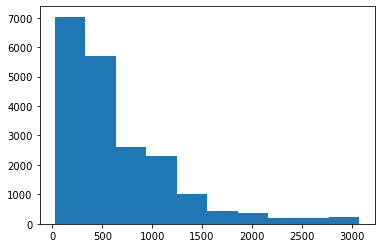

In [80]:
import matplotlib.pyplot as plt
plt.hist(loans['LOAN_AMOUNT'])

(array([  18.,   84.,  581., 1273., 3532., 3639., 4643., 3414., 1997.,
         938.]),
 array([3.21887582, 3.70009426, 4.1813127 , 4.66253113, 5.14374957,
        5.624968  , 6.10618644, 6.58740487, 7.06862331, 7.54984174,
        8.03106018]),
 <BarContainer object of 10 artists>)

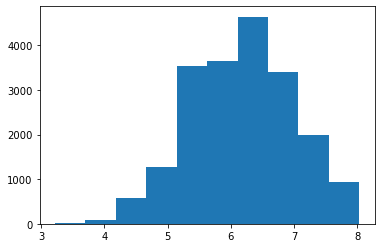

In [81]:
plt.hist(loans['logAmount'])
#The skewed distribution of loan_amount has been smoothed out

## Loan Amount by Sector

15. What is the total loan amount in each sector? Create a bar chart to demonstrate.

<Figure size 1440x504 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, 'SECTORS vs LOAN AMOUNT')

Text(0.5, 0, 'SECTORS')

Text(0, 0.5, 'LOAN AMOUNT')

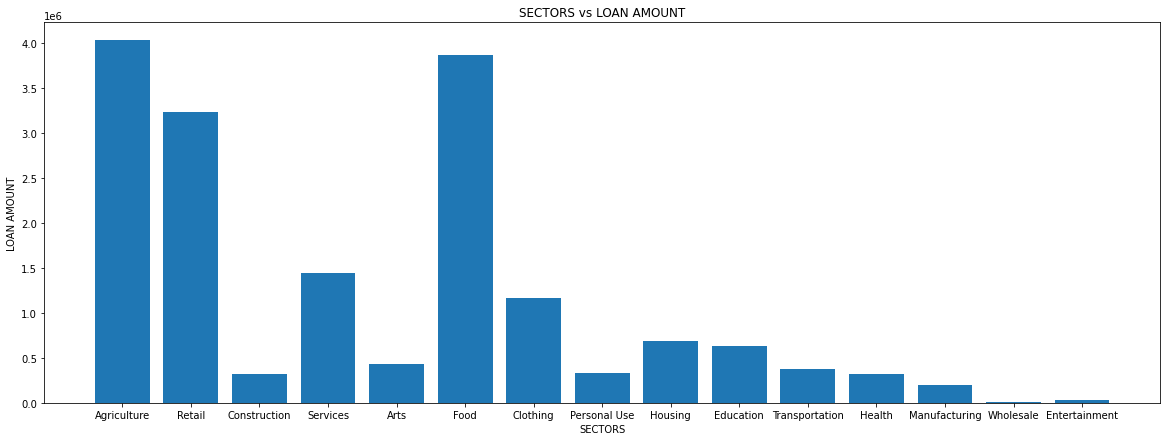

In [31]:
sectors = loans.SECTOR_NAME.unique()
sector_loan_amount = []
for val in sectors:
    sector_loan_amount.append(loans.groupby('SECTOR_NAME')['LOAN_AMOUNT'].sum()[val])

plt.figure(figsize=(20,7))
plt.bar(sectors, sector_loan_amount)
plt.title('SECTORS vs LOAN AMOUNT')
plt.xlabel('SECTORS')
plt.ylabel('LOAN AMOUNT')
plt.show()

## Loan Amounty by Country
16. What is the total number of loans in each country? Create a bar chart to demonstrate.

In [96]:
loansCountry = loansAnalysis.groupby('COUNTRY_NAME')['LOAN_ID'].count()

<AxesSubplot:xlabel='COUNTRY_NAME'>

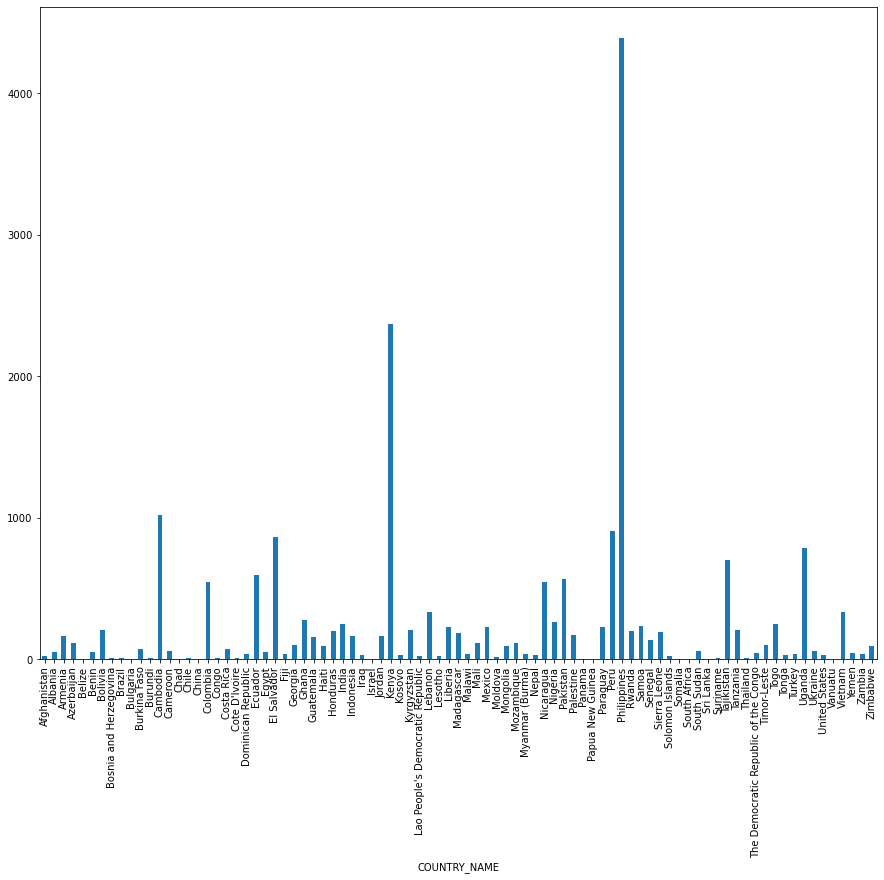

In [97]:
loansCountry.plot(kind = 'bar', figsize = (15, 12))

17. Change the POSTED_TIME to DateTimeIndex and create a new variable 'Year' using the year of POSTED_TIME. What is the total number of loans in each year? Create a line graph to demonstrate.

In [32]:
loansAnalysis['Year'] = pd.DatetimeIndex(loansAnalysis['POSTED_TIME']).year
loansAnalysis.head()

<ipython-input-32-34d126ba1a80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loansAnalysis['Year'] = pd.DatetimeIndex(loansAnalysis['POSTED_TIME']).year


,LOAN_ID,ORIGINAL_LANGUAGE,LOAN_AMOUNT,STATUS,IMAGE_ID,SECTOR_NAME,COUNTRY_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,POSTED_TIME,DISBURSE_TIME,RAISED_TIME,LENDER_TERM,NUM_JOURNAL_ENTRIES,NUM_BULK_ENTRIES,TIME_LENGTH,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL,Year
0,1570258,English,2500.0,funded,1,Agriculture,Armenia,shared,0.1,2018-07-18 07:55:36+00:00,2018-06-18 07:00:00+00:00,2018-08-19 06:35:27+00:00,30.0,1,1,31 days 22:39:51,irregular,field_partner,2018
1,240272,English,1250.0,funded,1,Retail,Mongolia,shared,0.2,2010-10-19 01:32:27+00:00,2010-10-15 07:00:00+00:00,2010-10-20 18:18:48+00:00,26.0,3,2,1 days 16:46:21,monthly,field_partner,2010
2,270125,Spanish,1000.0,funded,1,Construction,El Salvador,standard,0.0,2011-02-01 21:56:27+00:00,2011-01-21 08:00:00+00:00,2011-02-21 23:28:06+00:00,20.0,1,1,20 days 01:31:39,monthly,field_partner,2011
3,709842,English,2000.0,funded,1,Services,Lebanon,standard,0.0,2014-05-14 10:50:35+00:00,2014-04-14 07:00:00+00:00,2014-05-18 05:39:10+00:00,14.0,2,1,3 days 18:48:35,monthly,field_partner,2014
4,223631,English,525.0,funded,1,Services,Rwanda,shared,0.2,2010-08-17 16:31:32+00:00,2010-07-23 07:00:00+00:00,2010-08-19 20:49:40+00:00,6.0,1,1,2 days 04:18:08,monthly,field_partner,2010


In [99]:
yearAmount = loansAnalysis.groupby('Year')['LOAN_ID'].count()

## Pivot Table 
18. Create a pivot table to show the average loan amount in each sector each year.

In [102]:
loansAnalysis.pivot_table('LOAN_AMOUNT', index = 'SECTOR_NAME', columns = 'Year')


Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SECTOR_NAME,,,,,,,,,,,,,,,,
Agriculture,466.666667,663.461538,732.777778,750.493421,658.465608,713.104839,790.314570,806.804281,783.409611,674.462891,661.909449,667.521739,667.214533,660.568384,503.247863,493.373494
Arts,NaN,600.000000,678.571429,521.666667,706.578947,836.904762,740.625000,710.227273,820.000000,532.575758,648.611111,635.256410,690.625000,754.687500,708.333333,556.250000
Clothing,725.000000,794.047619,649.404762,675.000000,855.000000,867.857143,748.823529,702.556818,725.815217,770.333333,862.250000,857.368421,705.769231,745.786517,740.948276,745.588235
Construction,NaN,855.000000,786.250000,862.500000,726.785714,968.750000,837.500000,835.714286,868.750000,794.230769,817.857143,950.000000,737.931034,677.173913,975.000000,691.666667
Education,NaN,NaN,400.000000,533.333333,1158.333333,732.894737,795.238095,958.888889,709.638554,992.500000,761.197917,893.689320,837.500000,894.212963,720.833333,502.272727
Entertainment,NaN,NaN,1091.666667,NaN,1812.500000,725.000000,937.500000,800.000000,350.000000,1500.000000,1508.333333,637.500000,441.666667,875.000000,775.000000,NaN
Food,785.714286,523.546512,625.167785,595.474138,692.924528,670.146520,744.689542,703.211009,633.908840,595.263158,601.726343,569.268293,618.700397,650.716146,558.403955,603.985507
Health,1283.333333,675.000000,850.000000,515.000000,843.750000,1119.444444,908.333333,939.285714,1170.833333,965.000000,663.333333,769.354839,775.000000,766.847826,660.483871,387.500000
Housing,350.000000,575.000000,443.750000,617.105263,668.125000,902.419355,1003.333333,1034.126984,677.731092,724.679487,645.833333,526.351351,611.111111,376.900000,432.317073,468.181818


## Scatterplot of LOAN_AMOUNT & LENDER_TERM

19. Get the number of days in the TIME_LENGTH variable we created and create a new variable 'Days'using it. Create a scatterplot of 'LOAN_AMOUNT' and 'Days'. What's your observation?

In [106]:
loansAnalysis['Days'] = loansAnalysis['TIME_LENGTH'].dt.days

<ipython-input-106-539e235570b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loansAnalysis['Days'] = loansAnalysis['TIME_LENGTH'].dt.days


20. Create a scatterplot of 'LOAN_AMOUNT' and 'LENDER_TERM'. What's your observation?

<Figure size 1080x864 with 0 Axes>

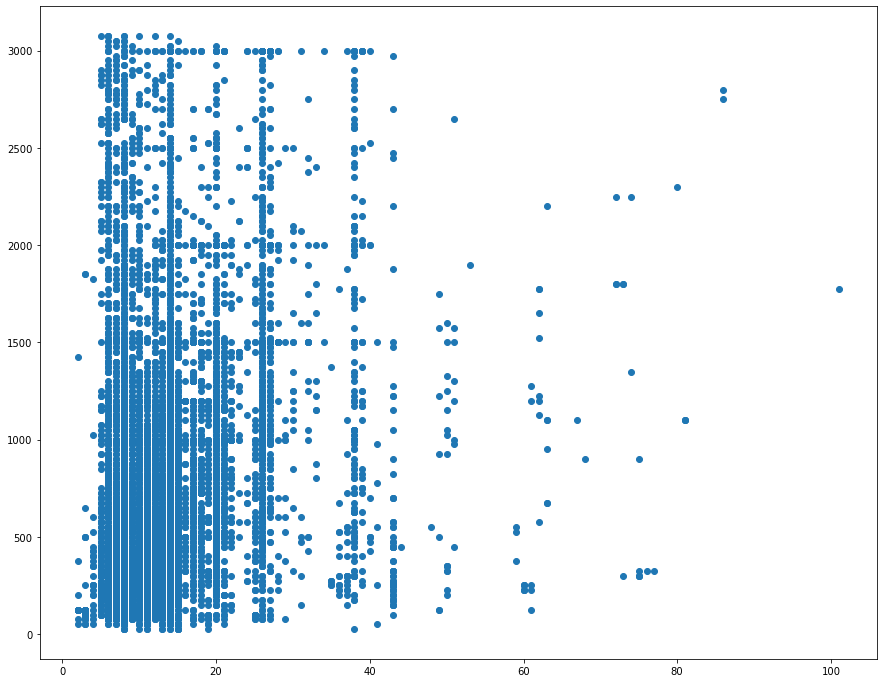

In [108]:
plt.figure(figsize = (15, 12))
plt.scatter(loansAnalysis['LENDER_TERM'], loansAnalysis['LOAN_AMOUNT'])

## Model & Analysis

21. Prepare the data for model analysis. The target variable is 'STATUS'. The predictor variables we want to include:<br>
ORIGINAL_LANGUAGE<br>
the logAmount variable we created<br>
IMAGE_ID (the one we coded to 0/1)<br>
SECTOR_NAME                              
COUNTRY_NAME                             
CURRENCY_POLICY                          
CURRENCY_EXCHANGE_COVERAGE_RATE (the one we tranfromed)<br>
Days we creatd based on the TIME_LENGTH <br>
PREDISBURSE we created<br>
LENDER_TERM                   
NUM_JOURNAL_ENTRIES  
NUM_BULK_ENTRIES     
REPAYMENT_INTERVAL  
DISTRIBUTION_MODEL<br>
Now we can drop all records with missing values at this point.

In [34]:
# Drop all records with missing values
loanAnalysis = loansAnalysis.dropna()

In [ ]:
target = loansAnalysis['STATUS']
features = ['ORIGINAL_LANGUAGE', 'logAmount', 'IMAGE_ID', 'SECTOR_NAME', 'COUNTRY_NAME', 'CURRENCY_POLICY',
            'CURRENCY_EXCHANGE_COVERAGE_RATE', 'Days,', 'PREDISBURSE', 'LENDER_TERM', 
            'NUM_BULK_ENTRIES', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']
X = loansAnalysis[features]

22. Generate dummies for all categorical variables

In [ ]:
X.head()
cat_vars = ['ORIGINAL_LANGUAGE', 'SECTOR_NAME', 'COUNTRY_NAME', 'CURRENT_POLICY',
           'PREDISBURSE', 'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL']
X = pd.get.dumies(X, colums=cat_vars, drop_first = True)

In [ ]:
x.head()

## Preparing datasets

23. Prepare training and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.33, random_state = 1)

## Regression Model

24. Fit a logistic regression model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logRegressor = LogisticRegression()
logRegressor.fit(X_train, y_train)

25. Get the predicted results for the test dataset

In [ ]:
y_pred = logRegressor.predict(X_test)
y_pred[:10]

26. Evaluate the model using accuracy rate and confusion matrix.

In [ ]:
from skilearn.metriics import accuracy_score
accuracy_score(y_true = y_test, y_pred = y_pred)

In [ ]:
from skilearn.metriics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_pred)

27. Repeat Step 24-26 using another classification method. Which method has better results?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

## Finding & Managerial Implications
The LOAN_STATUS prediction above represents a clear classification problem as the loan condition must classify whether it is funded or not. Therefore, it can be solved using classification methods such as logistic regression, decision tree algorithm, random forest method. We implemented two of the logistic classification models and decision tree  models, and based on the results, the logistic regression model is best suited for training the model with maximum accuracy.

## Conclusions

Throughout the year, lending has played an important role in the financial world. Past research has used several machine learning techniques such as decision trees, neural networks, logistic regression, and vector machines. Each machine learning algorithm has been proven to be accurate and useful in a variety of settings. While creating a machine learning model, it is so important to preprocess the data regardless of the model type. In reality, it is  more important than the model itself, and  not all columns are consequently relevant. It also distorts the model, so pre-process and practice.

## References

“Loans That Change Lives.” Kiva, www.kiva.org/error.html?url=builddocs%2Fdata&status=404. Accessed 7 Dec. 2021.

Small Business Trends LLC. “How to Get a Kiva Loan: A Step by Step Guide.” Small Business Trends, 21 Apr. 2020, smallbiztrends.com/2017/05/how-to-get-a-kiva-loan.html.
